### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set(rc={'figure.figsize':(14, 6)})

import warnings
warnings.filterwarnings('ignore')

### Data

In [2]:
train = pd.read_csv('../../data/house_prices/train.csv')
test  = pd.read_csv('../../data/house_prices/test.csv')

full = pd.concat([train, test])
train_N = len(train)

### SalePrice and skewness

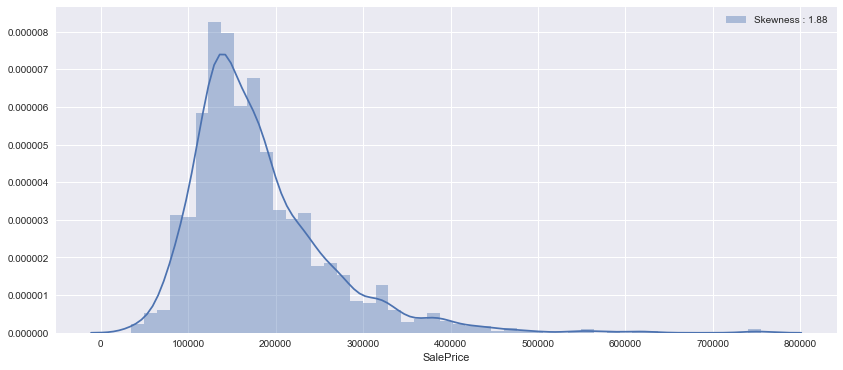

In [3]:
g = sns.distplot(train["SalePrice"], label="Skewness : %.2f"%(train["SalePrice"].skew()))
_ = g.legend(loc="best")

### This plot is amazing!

I really like this plot, it's amazing because to a first approximation the square footage of a house is an excellent predictor single handedly.  What I like even more are the outliers (around [4500, 5500] GrLivArea and [150 000, 200 000] SalePrice)

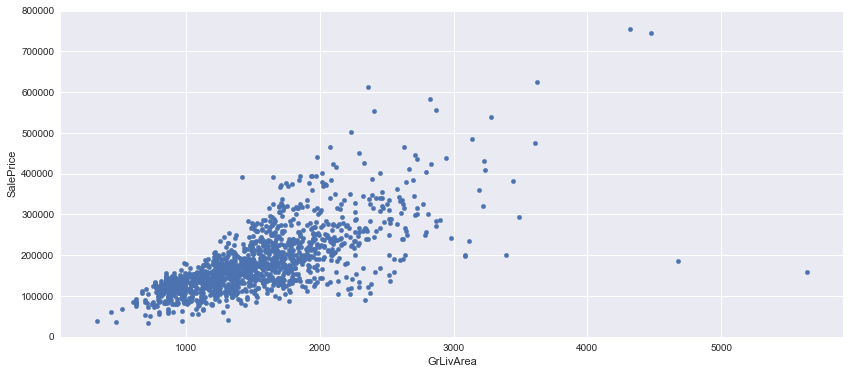

In [4]:
train.plot(kind="scatter", x="GrLivArea", y='SalePrice', ylim=(0,800000));

### SalePrice as a function of YearBuilt

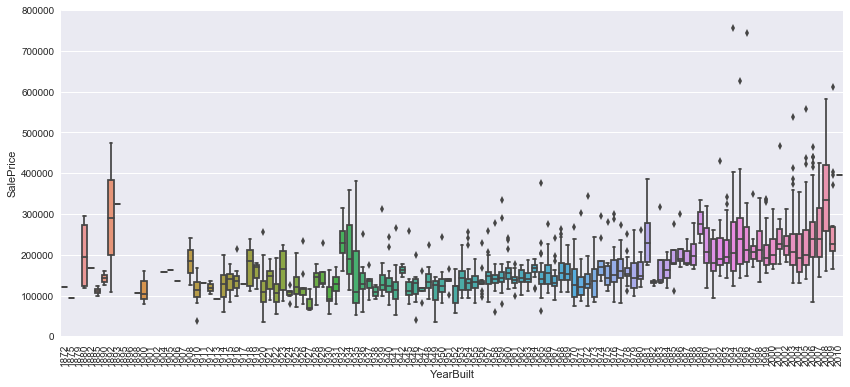

In [5]:
g = sns.boxplot(x="YearBuilt", y="SalePrice", data=full)
g.axis(ymin=0, ymax=800000)
_ = plt.xticks(rotation=90)

### Saleprice correlation matrix

Note some columns correlate very strongly (GarageCars/GarageArea and 1stFlrSF/TotalBsmtSF)

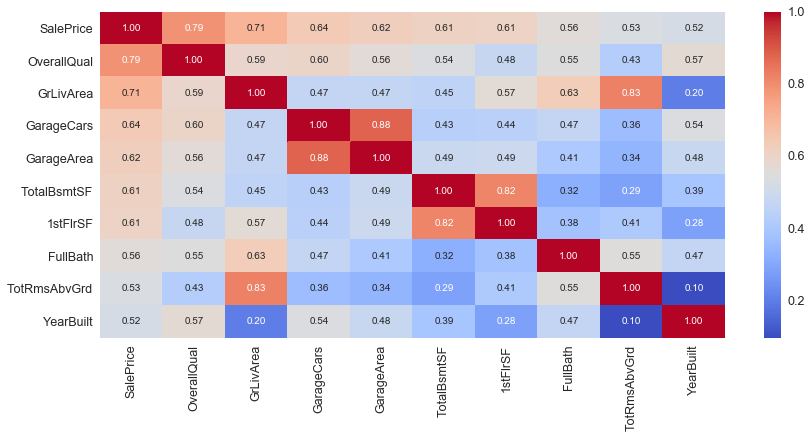

In [6]:
cols = train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
_ = sns.heatmap(cm, 
                cbar=True, annot=True,
                fmt='.2f', cmap="coolwarm",
                annot_kws={'size': 10},
                yticklabels=cols.values,
                xticklabels=cols.values)

### Pairplots

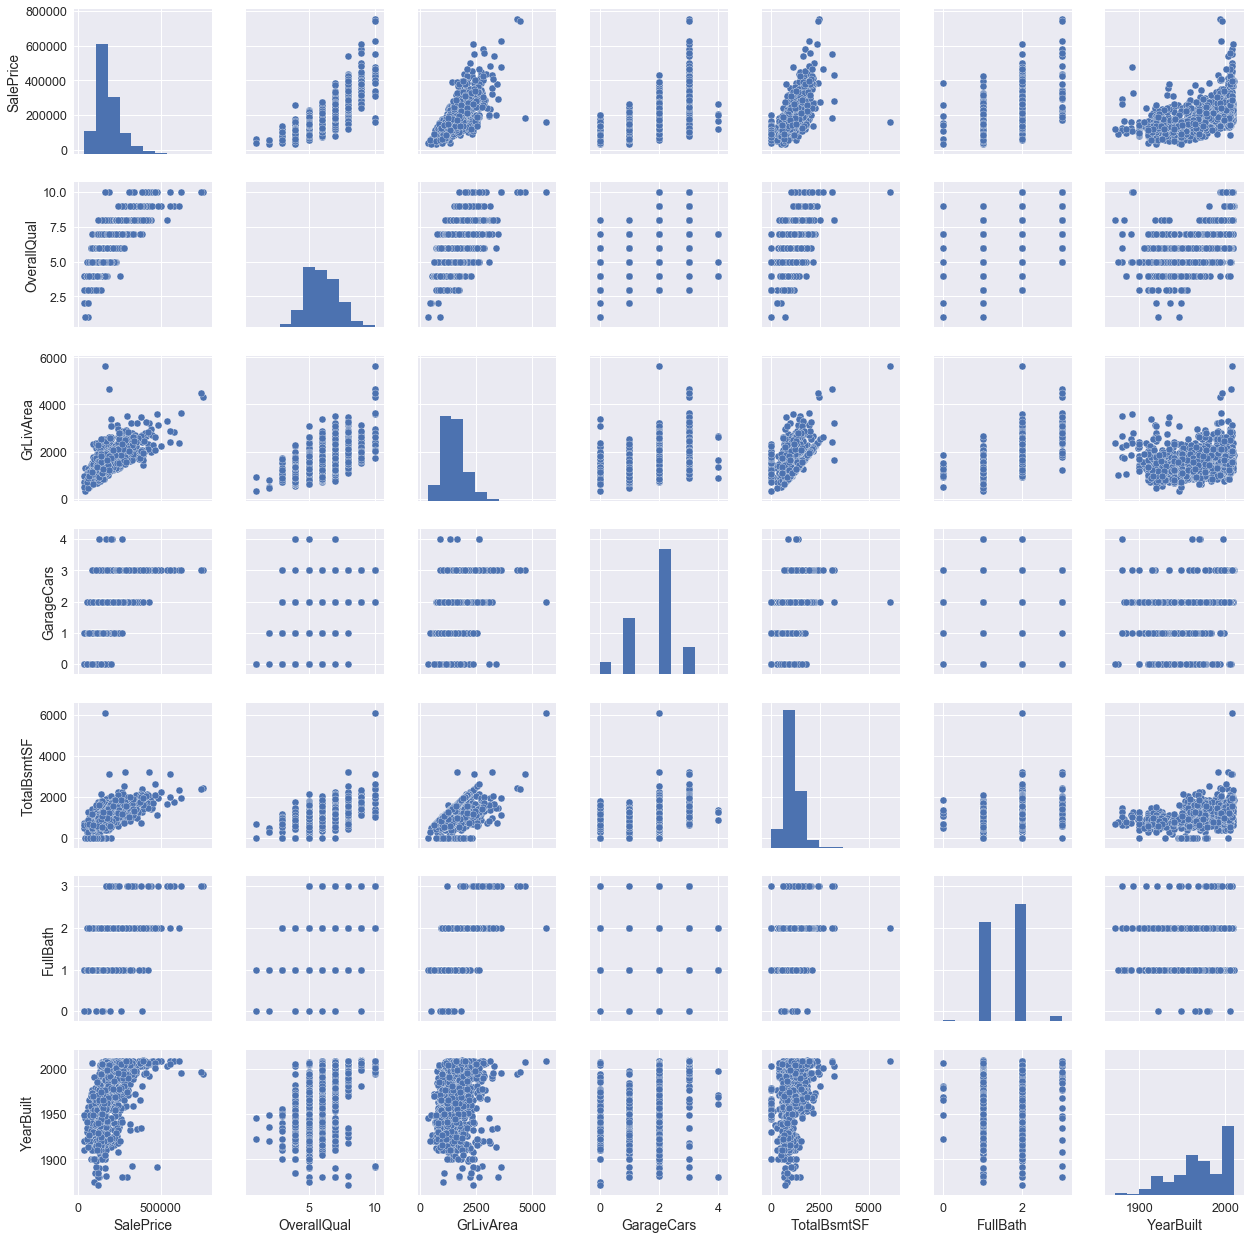

In [7]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
_ = sns.pairplot(train[cols], size = 2.5)

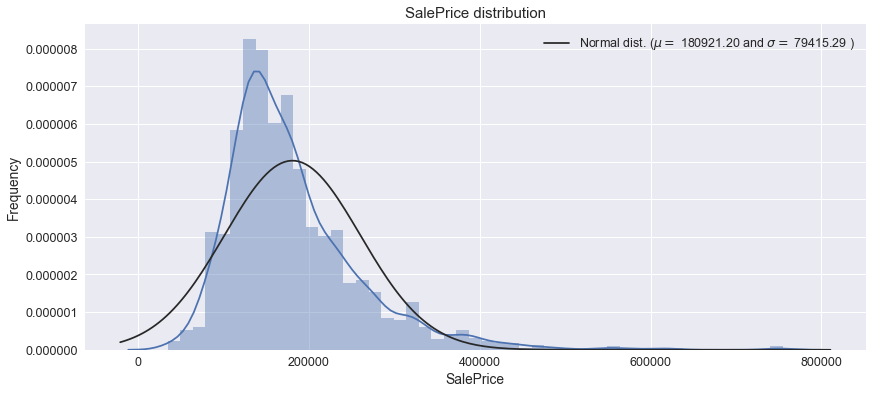

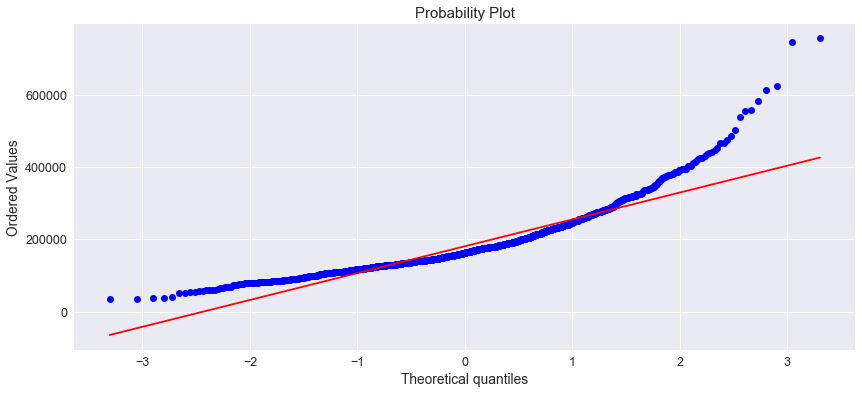

In [8]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
_ = stats.probplot(train['SalePrice'], plot=plt)